# 05-Solution
The code is modifed from fastFONls/python/example/
The original code provides the compiled `single_pitch.so` only on Linux, therefore we need to compile and test for each platform. 
The test is done in `single_pitch.py` and we put the linux and mac binaries here, the windows binary will follow asap.

In [5]:
import sys
from scipy.io import wavfile
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import os

In [6]:
sys.path.append('./')
import single_pitch


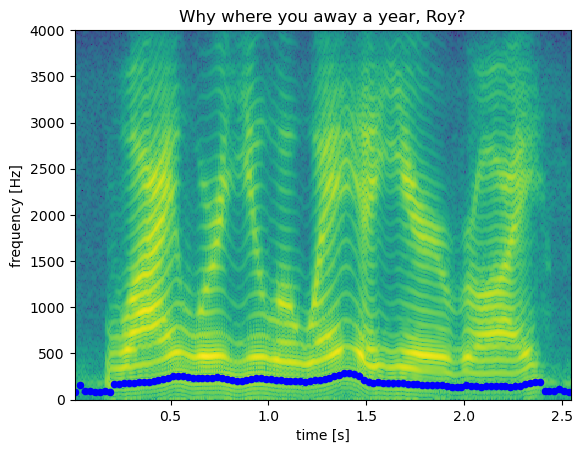

In [7]:
[samplingFreq, speechSignal] = wavfile.read('../data/roy.wav')
nData = speechSignal.shape[0]

# set up
segmentTime = 0.025 # seconds
segmentLength = round(segmentTime*samplingFreq) # samples
nSegments = int(np.floor(nData/segmentLength))
f0Bounds = np.array([80, 400])/samplingFreq
maxNoHarmonics = 15
f0Estimator = single_pitch.single_pitch(segmentLength, maxNoHarmonics, f0Bounds)

# do the analysis
idx = np.array(range(0, segmentLength))
f0Estimates = np.zeros((nSegments,)) # cycles/sample
for ii in range(nSegments):
    speechSegment = np.array(speechSignal[idx], dtype=np.float64)
    f0Estimates[ii] = (samplingFreq/(2*np.pi))*f0Estimator.est(speechSegment)
    idx = idx + segmentLength

timeVector = np.array(range(1, nSegments+1))*segmentTime-segmentTime/2

# compute the spectrogram of the signal
nOverlap = round(3*segmentLength/4)
[stftFreqVector, stftTimeVector, stft] = signal.spectrogram(speechSignal,
                                                            fs=samplingFreq,
                                                            nperseg=segmentLength,
                                                            noverlap=nOverlap, nfft=2048)
powerSpectrum = np.abs(stft)**2;

# plot the results, same as in the matlab code
maxDynamicRange = 60 # dB
plt.pcolormesh(stftTimeVector, stftFreqVector, 10*np.log10(powerSpectrum))
plt.scatter(timeVector, f0Estimates, c='b', s=20)
plt.title('Why where you away a year, Roy?')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.show()
